In [75]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as st
from scipy.stats import sem
from scipy.stats import linregress

In [3]:
csv_path = "Energy Census and Economic Data US 2010-2014.csv"
df = pd.read_csv(csv_path)
df.head()

,StateCodes,State,Region,Division,Coast,Great Lakes,TotalC2010,TotalC2011,TotalC2012,TotalC2013,...,RINTERNATIONALMIG2013,RINTERNATIONALMIG2014,RDOMESTICMIG2011,RDOMESTICMIG2012,RDOMESTICMIG2013,RDOMESTICMIG2014,RNETMIG2011,RNETMIG2012,RNETMIG2013,RNETMIG2014
0,AL,Alabama,3.0,6.0,1.0,0.0,1931522,1905207,1879716,1919365,...,1.165832,1.157861,-0.020443,-0.168414,0.396416,0.420102,1.011941,1.001333,1.562247,1.577963
1,AK,Alaska,4.0,9.0,1.0,0.0,653221,653637,649341,621107,...,3.203618,2.869760,-1.175137,-1.949571,-3.789313,-13.754494,0.948185,1.835376,-0.585695,-10.884734
2,AZ,Arizona,4.0,8.0,0.0,0.0,1383531,1424944,1395839,1414383,...,1.090035,1.091283,1.341472,-0.420875,-0.580562,-1.313050,2.317801,0.621971,0.509473,-0.221767
3,AR,Arkansas,3.0,7.0,0.0,0.0,1120632,1122544,1067642,1096438,...,2.141877,2.129805,1.369514,5.131282,3.910476,6.280636,3.336628,7.155212,6.052353,8.410441
4,CA,California,4.0,9.0,1.0,0.0,7760629,7777115,7564063,7665241,...,4.207353,4.177389,-1.162079,-1.173951,-1.341226,-0.830982,2.761377,2.772770,2.866127,3.346406


In [4]:
df_totals = df[["StateCodes", "TotalC2010", "TotalC2011", "TotalC2012", "TotalC2013", "TotalC2014"]]
df_totals.head()

df_totals["Sum_Total"] = df["TotalC2010"] + df["TotalC2011"] + df["TotalC2012"]+ df["TotalC2013"] + df["TotalC2014"]
df_totals.head()

<ipython-input-4-6f485475e200>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_totals["Sum_Total"] = df["TotalC2010"] + df["TotalC2011"] + df["TotalC2012"]+ df["TotalC2013"] + df["TotalC2014"]


,StateCodes,TotalC2010,TotalC2011,TotalC2012,TotalC2013,TotalC2014,Sum_Total
0,AL,1931522,1905207,1879716,1919365,1958221,9594031
1,AK,653221,653637,649341,621107,603119,3180425
2,AZ,1383531,1424944,1395839,1414383,1422590,7041287
3,AR,1120632,1122544,1067642,1096438,1114409,5521665
4,CA,7760629,7777115,7564063,7665241,7620082,38387130


In [47]:
df_totals_sort = df_totals.sort_values("Sum_Total", ascending=False)
df_totals_sort.head(10)

#Top 5 are TX, CA, LA, FL, and IL
#161,377,423 total, or 33.33% of total emissions from US

,StateCodes,TotalC2010,TotalC2011,TotalC2012,TotalC2013,TotalC2014,Sum_Total
51,US,97446021,96827465,94411432,97141368,98385210,484211496
42,TX,11687521,11906249,11931169,12660976,12899498,61085413
4,CA,7760629,7777115,7564063,7665241,7620082,38387130
17,LA,4385758,4388867,4255161,4196622,4279443,21505851
8,FL,4282673,4141711,4029903,4076406,4121680,20652373
12,IL,3955091,3937616,3820547,3991089,4042313,19746656
37,PA,3752280,3725014,3623997,3826959,3902434,18830684
34,OH,3824933,3792585,3655849,3739974,3809648,18822989
31,NY,3723729,3611091,3503309,3626150,3742892,18207171
9,GA,3100144,2982837,2767491,2782782,2850990,14484244


In [16]:
df_totals["Sum_Total"].mean()
#Average consumption was 18,624097.15 BTU for these data

18624097.153846152

In [46]:
df_top5 = df.loc[(df["StateCodes"] == "US") | (df["StateCodes"] == "TX") |
                 (df["StateCodes"] == "CA") | (df["StateCodes"] == "LA") |
                 (df["StateCodes"] == "FL") | (df["StateCodes"] == "IL")]
df_top5

,StateCodes,State,Region,Division,Coast,Great Lakes,TotalC2010,TotalC2011,TotalC2012,TotalC2013,...,RINTERNATIONALMIG2013,RINTERNATIONALMIG2014,RDOMESTICMIG2011,RDOMESTICMIG2012,RDOMESTICMIG2013,RDOMESTICMIG2014,RNETMIG2011,RNETMIG2012,RNETMIG2013,RNETMIG2014
4,CA,California,4.0,9.0,1.0,0.0,7760629,7777115,7564063,7665241,...,4.207353,4.177389,-1.162079,-1.173951,-1.341226,-0.830982,2.761377,2.772770,2.866127,3.346406
8,FL,Florida,3.0,5.0,1.0,0.0,4282673,4141711,4029903,4076406,...,5.783717,5.687300,5.540393,5.125320,4.918783,7.016123,11.359606,10.722573,10.702501,12.703423
12,IL,Illinois,2.0,3.0,0.0,1.0,3955091,3937616,3820547,3991089,...,2.505015,2.518554,-5.424762,-5.690472,-5.238098,-7.369176,-3.182714,-3.382339,-2.733083,-4.850621
17,LA,Louisiana,3.0,7.0,1.0,0.0,4385758,4388867,4255161,4196622,...,1.651933,1.620656,0.454747,-0.167961,-0.496858,-1.311569,1.940240,1.525589,1.155076,0.309086
42,TX,Texas,3.0,7.0,1.0,0.0,11687521,11906249,11931169,12660976,...,3.201213,3.166214,4.577945,5.630982,4.428284,5.778507,7.675275,8.724163,7.629497,8.944721
51,US,United States,NaN,NaN,NaN,NaN,97446021,96827465,94411432,97141368,...,3.168211,3.135081,NaN,NaN,NaN,NaN,2.941968,3.051932,3.168211,3.135081


In [20]:
df_top5_totals = df_totals.loc[(df["StateCodes"] == "TX") |
                 (df["StateCodes"] == "CA") | (df["StateCodes"] == "LA") |
                 (df["StateCodes"] == "FL") | (df["StateCodes"] == "IL")]

df_top5_totals

,StateCodes,TotalC2010,TotalC2011,TotalC2012,TotalC2013,TotalC2014,Sum_Total
4,CA,7760629,7777115,7564063,7665241,7620082,38387130
8,FL,4282673,4141711,4029903,4076406,4121680,20652373
12,IL,3955091,3937616,3820547,3991089,4042313,19746656
17,LA,4385758,4388867,4255161,4196622,4279443,21505851
42,TX,11687521,11906249,11931169,12660976,12899498,61085413


In [52]:
#Find the average consumption per state from 2010-2014
top5_sum=df_top5_totals["Sum_Total"].sum()
all50_sum=df_totals["Sum_Total"][51]
all50_avg=all50_sum/51
all50_avg

9494343.05882353

Text(0, 0.5, 'BTU Consumed (billions)')

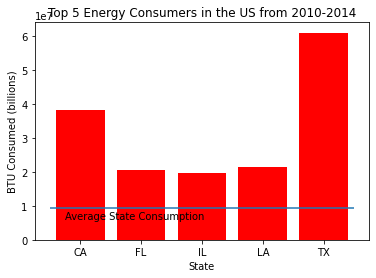

In [73]:
x_axis = np.arange(len(df_top5_totals))
tick_locations = [value for value in x_axis]
plt.bar(x_axis, df_top5_totals["Sum_Total"], color="red", align="center")
plt.xticks(tick_locations, df_top5_totals["StateCodes"])
plt.title("Top 5 Energy Consumers in the US from 2010-2014")
plt.hlines(y=all50_avg, xmin=-0.5, xmax=4.5)
plt.annotate("Average State Consumption", (-0.25, 6000000))
plt.xlabel("State")
plt.ylabel("BTU Consumed (billions)")

[Text(0, 0, 'CA'),
 Text(1, 0, 'FL'),
 Text(2, 0, 'IL'),
 Text(3, 0, 'LA'),
 Text(4, 0, 'TX')]

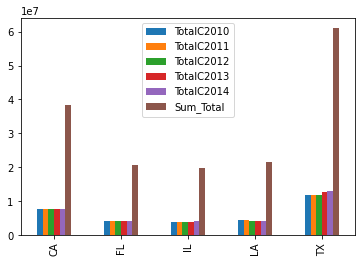

In [27]:
multi_plot = df_top5_totals.plot(kind = "bar")
multi_plot.set_xticklabels(df_top5_totals["StateCodes"])

([<matplotlib.patches.Wedge at 0x200d2160670>,
 [Text(1.0660595669751989, 0.27114018451836297, 'CA'),
  Text(0.8874610879999629, 0.6499329329137908, 'FL'),
  Text(0.6887391109422266, 0.857693673206531, 'IL'),
  Text(0.4373872334316557, 1.0093029317459663, 'LA'),
  Text(-0.13924864674579082, 1.0911506836269067, 'TX'),
  Text(-0.5501634724233689, -0.9525335446119791, 'Remaining')])

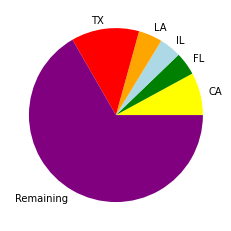

In [36]:
states = ["CA", "FL", "IL", "LA", "TX", "Remaining"]
#BTU = df_top5_totals["Sum_Total"] #322834073 US Sum Total minus Top 5 totals
BTU = [38387130, 20652373, 19746656, 21505851, 61085413, 322834073]
colors = ["yellow","green","lightblue","orange","red", "purple"]

plt.pie(BTU, labels=states, colors=colors)

Text(5000000, 0.5, 'r = 0.85')

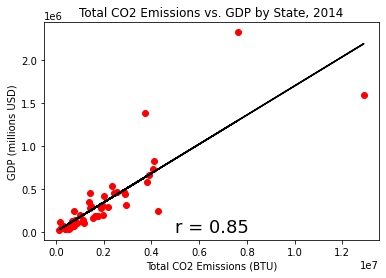

In [96]:
df_scatter = df.loc[(df["StateCodes"]!="US")]

x_vals=df_scatter["TotalC2014"]
y_vals=df_scatter["GDP2014"]
plt.scatter(x_vals, y_vals, marker="o", color = "red")
cg_slope, cg_int, cg_r, cg_p, cg_std_err = st.linregress(x_vals, y_vals)
cg_fit = cg_slope * x_vals + cg_int
plt.title("Total CO2 Emissions vs. GDP by State, 2014")
plt.xlabel("Total CO2 Emissions (BTU)")
plt.ylabel("GDP (millions USD)")
plt.plot(x_vals, cg_fit, color = "black")
plt.annotate(f"r = {round(cg_r,2)}", (5000000, 0.5), fontsize=18)

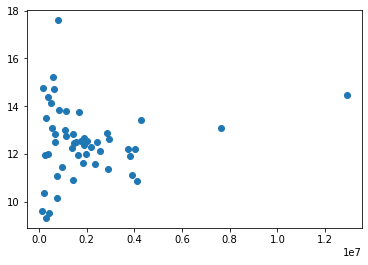

In [42]:
x_vals=df_scatter["TotalC2014"]
y_vals=df_scatter["RBIRTH2014"]
plt.scatter(x_vals, y_vals, marker="o")

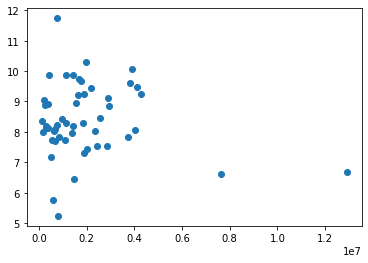

In [43]:
x_vals=df_scatter["TotalC2014"]
y_vals=df_scatter["RDEATH2014"]
plt.scatter(x_vals, y_vals, marker="o")

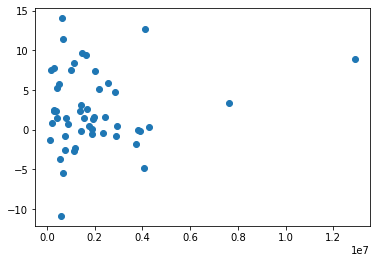

In [44]:
x_vals=df_scatter["TotalC2014"]
y_vals=df_scatter["RNETMIG2014"]
plt.scatter(x_vals, y_vals, marker="o")